In [9]:
from transformers import pipeline

# ============================
# ZERO-SHOT CLASSIFICATION
# ============================
print("\n=== ZERO-SHOT CLASSIFICATION ===")

classifier = pipeline(
    "zero-shot-classification",
    model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli",
    device=0
)

text_ua = "Економіка України зазнає значних змін через війну та міжнародну підтримку."
labels = ["політика", "економіка", "спорт", "культура"]

result = classifier(text_ua, labels)

print("Text:", text_ua)
print("Labels:", labels)
print("Prediction:")
for lbl, score in zip(result["labels"], result["scores"]):
    print(f"  {lbl}: {score:.4f}")


# ============================
# SUMMARIZATION
# ============================
print("\n=== SUMMARIZATION ===")

summarizer = pipeline(
    "text2text-generation",
    model="google/mt5-small",
    device=0
)

text = """
Сьогодні в Києві відбулося засідання уряду, на якому було розглянуто питання
економічної стабільності, соціального захисту населення та подальшої підтримки
критичної інфраструктури в умовах воєнного стану.
"""

result = summarizer(
    "summarize: " + text.strip(),
    max_length=30,
    do_sample=False
)

print("Original text:")
print(text.strip())
print("\nSummary:")
print(result[0]["generated_text"])


# ============================
# TRANSLATION (UA - EN)
# ============================
print("\n=== TRANSLATION (UA → EN) ===")

translator = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-uk-en",
    device=0
)

ua_text = "Україна продовжує боротьбу за свою незалежність."
translated = translator(ua_text)

print("Ukrainian:", ua_text)
print("English:", translated[0]["translation_text"])




=== ZERO-SHOT CLASSIFICATION ===


Device set to use cuda:0


Text: Економіка України зазнає значних змін через війну та міжнародну підтримку.
Labels: ['політика', 'економіка', 'спорт', 'культура']
Prediction:
  економіка: 0.9894
  політика: 0.0063
  культура: 0.0022
  спорт: 0.0022

=== SUMMARIZATION ===


Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Original text:
Сьогодні в Києві відбулося засідання уряду, на якому було розглянуто питання
економічної стабільності, соціального захисту населення та подальшої підтримки
критичної інфраструктури в умовах воєнного стану.

Summary:
<extra_id_0>.

=== TRANSLATION (UA → EN) ===


Device set to use cuda:0


Ukrainian: Україна продовжує боротьбу за свою незалежність.
English: Ukraine continues its fight for independence.


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Device: cuda

=== TEXT-TO-IMAGE ===


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

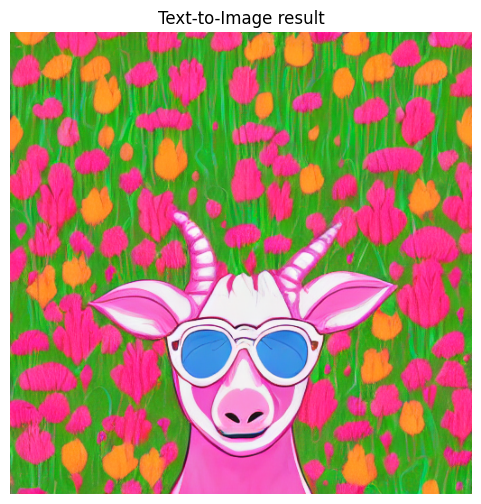

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline
from sklearn.datasets import load_sample_image

# ----------------------------
# 0) Device
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ----------------------------
# 1) TEXT-TO-IMAGE
# ----------------------------
print("\n=== TEXT-TO-IMAGE ===")

pipe_txt2img = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16
).to(device)

prompt = (
    "a pink goat wearing sunglasses, "
    "bright colors, sitting in a field of glowing flowers, "
    "highly detailed, gentle lighting, studio quality illustration"
)

image = pipe_txt2img(prompt).images[0]

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.title("Text-to-Image result")
plt.show()
